# <h1 style='background:#808000; border:2; border-radius: 10px; font-size:250%; font-weight: bold; color:black'><center>Laptop Specs and latest price</center></h1>


Laptop is a broader term, it applies to both laptops and netbooks, smartbooks.

Notebooks usually include laptops (often used "laptop"), made in a folding form factor. The laptop is carried folded, this allows you to protect the screen, keyboard and touchpad during transportation. This is also due to the ease of transportation (most often, a laptop is transported in a briefcase, which allows you not to hold it in your hands, but hang it on your shoulder).

The world's main laptop manufacturers are Acer, Asus, MSI, Huawei, LG, DELL, Lenovo, HP.

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style='background:#808000; border:0; border-radius: 10px; color:black'><center> TABLE OF CONTENTS </center></h1>

### [**1. IMPORTING LIBRARIES AND LOADING DATA**](#title-one)

### [**2. DATA INFORMATION**](#title-two)

### [**3. EXPLORATORY DATA ANALYSIS**](#title-three)

### [**4. FEATURE ENGENEERING**](#title-four)

### [**5. MACHINE LEARNING AND CLUSTER ANALYSIS**](#title-five)

### [**6. CONCLUSIONS AND RECOMENDATIONS**](#title-six)
    
<a id="title-one"></a>
<h1 style='background:#808000; border:2; border-radius: 10px; color:black'><center>IMPORTING LIBRARIES AND LOADING DATA</center></h1>

In [103]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
from sklearn.model_selection import train_test_split, KFold, GridSearchCV


from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet,Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

In [104]:
train = pd.read_csv('Cleaned_Laptop_data.csv')

<a id="title-two"></a>
<h1 style='background:#808000; border:2; border-radius: 10px; color:black'><center>DATA INFORMATION</center></h1>

Let's look at the data.

In [105]:
train

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,Missing,1,No,No,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,142990,0,0,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,Missing,4 GB GB,LPDDR4X,0 GB,512 GB,Windows,...,Missing,0,No,No,38990,47990,18,0.0,0,0


The data are presented by 896 objects according to 23 features.

It is necessary to find out the number of categorical and numerical features

In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

Let's look at the statistics of the dataset, as well as the presence of possible outliers.

In [107]:
train.describe()

,graphic_card_gb,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,1.198661,0.691964,76309.860491,88134.154018,18.527902,2.980469,367.391741,46.152902
std,2.057454,0.606282,46613.354368,55719.645554,10.508486,1.965254,1106.309355,136.079586
min,0.000000,0.000000,13990.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,45490.000000,54940.500000,11.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,63494.000000,78052.500000,19.000000,4.100000,19.000000,3.000000
75%,2.000000,1.000000,89090.000000,111019.500000,26.000000,4.400000,179.500000,23.250000
max,8.000000,3.000000,441990.000000,377798.000000,57.000000,5.000000,15279.000000,1947.000000


Hypothesis: There are outliers both for the minimum price values and for the maximum ones. There are also outliers in ratings and reviews, which can inform us about the most popular models, or fake reviews to boost sales.

<a id="title-three"></a>
<h1 style='background:#808000; border:2; border-radius: 10px; color:black'><center>EXPLORATORY DATA ANALYSIS</center></h1>

Let's check the information for gaps.

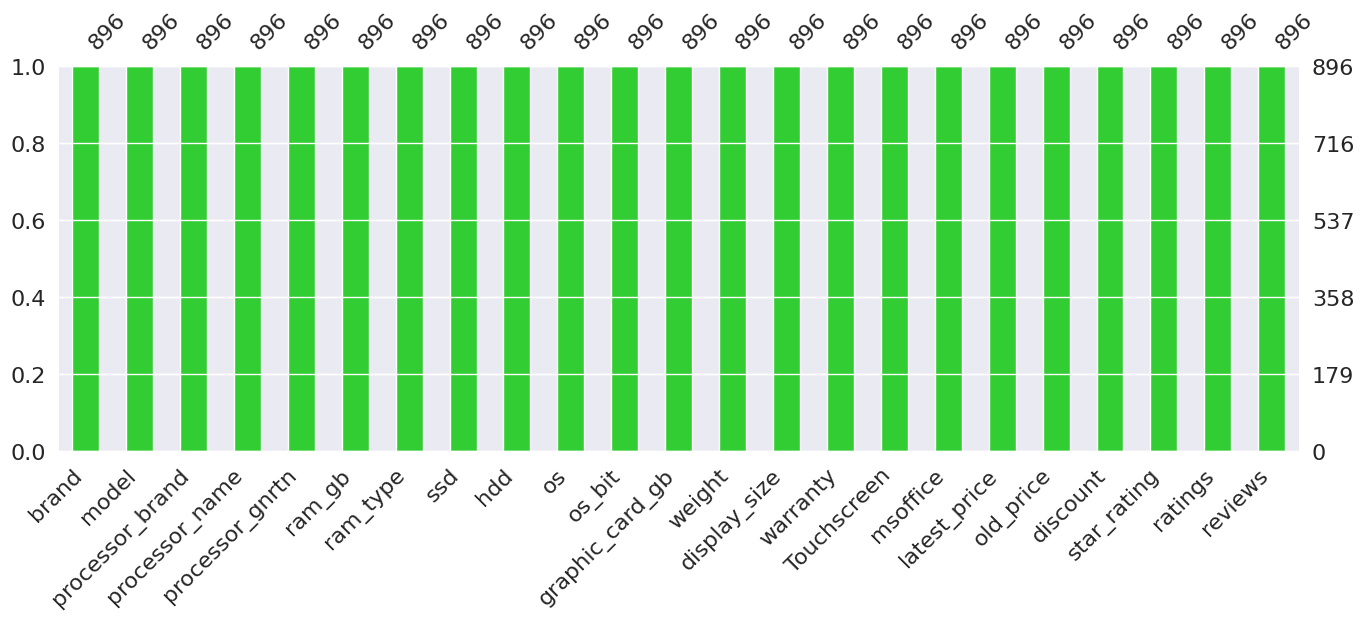

In [108]:
msno.bar(train, figsize = (16,5),color = "#32CD32")
plt.show()

There are no gaps in the data. But they can be disguised as column values.

Check the dataset for duplicates.

In [109]:
train.duplicated().sum()

20

Let's remove the duplicates.

In [110]:
train=train.drop_duplicates(keep='last')

Let's separate the continuous variables from the categorical ones and do the analysis.

In [111]:
for column_name in train.columns:
    unique_values = len(train[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'brand' has '21' unique values
Feature 'model' has '117' unique values
Feature 'processor_brand' has '5' unique values
Feature 'processor_name' has '28' unique values
Feature 'processor_gnrtn' has '8' unique values
Feature 'ram_gb' has '4' unique values
Feature 'ram_type' has '6' unique values
Feature 'ssd' has '8' unique values
Feature 'hdd' has '4' unique values
Feature 'os' has '3' unique values
Feature 'os_bit' has '2' unique values
Feature 'graphic_card_gb' has '5' unique values
Feature 'weight' has '3' unique values
Feature 'display_size' has '16' unique values
Feature 'warranty' has '4' unique values
Feature 'Touchscreen' has '2' unique values
Feature 'msoffice' has '2' unique values
Feature 'latest_price' has '429' unique values
Feature 'old_price' has '564' unique values
Feature 'discount' has '48' unique values
Feature 'star_rating' has '30' unique values
Feature 'ratings' has '310' unique values
Feature 'reviews' has '152' unique values


* Continuous variables are 'latest_price', 'old_price', 'ratings', 'reviews'.
* Categorical all others except 'model'.

Let's analyze the 10 cheapest and 10 most expensive laptops, depending on the brand.

Text(0.5, 1.0, 'Top 10 Expensive Laptop Brands')

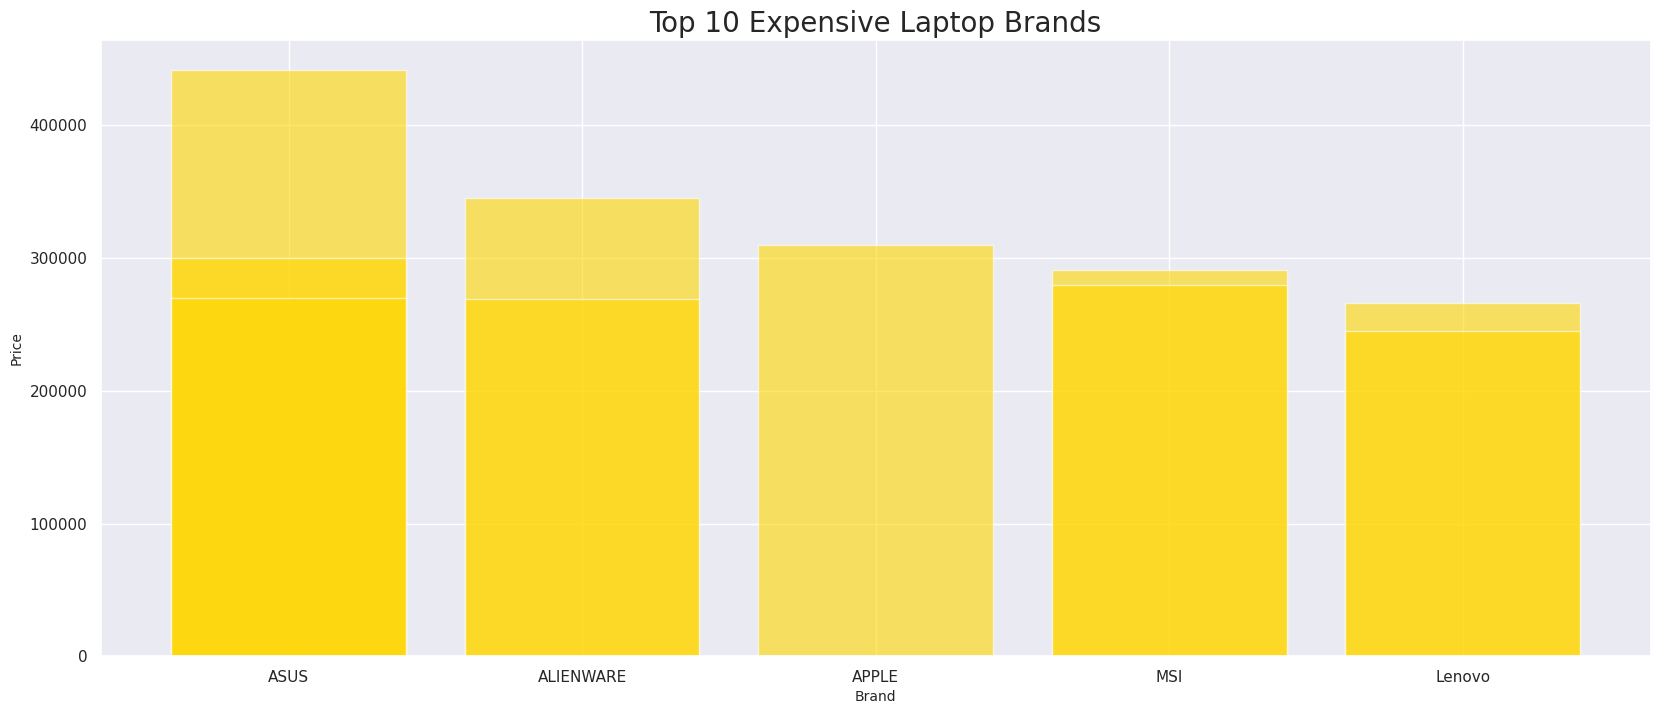

In [112]:
top10 = train.nlargest(10,'latest_price')
plt.figure(figsize=(20,8))
plt.bar(top10['brand'], top10['latest_price'],color='gold',alpha=0.6)
plt.ylabel('Price', fontsize = 10)
plt.xlabel("Brand", fontsize = 10)
plt.title("Top 10 Expensive Laptop Brands", fontsize = 20)

Let's look at the most expensive laptops using a pie chart.

In [113]:
import plotly.express as px
fig = px.sunburst(train, path=['brand', 'model'], values='latest_price',color='brand')
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.write_html('img.html')
fig.show()

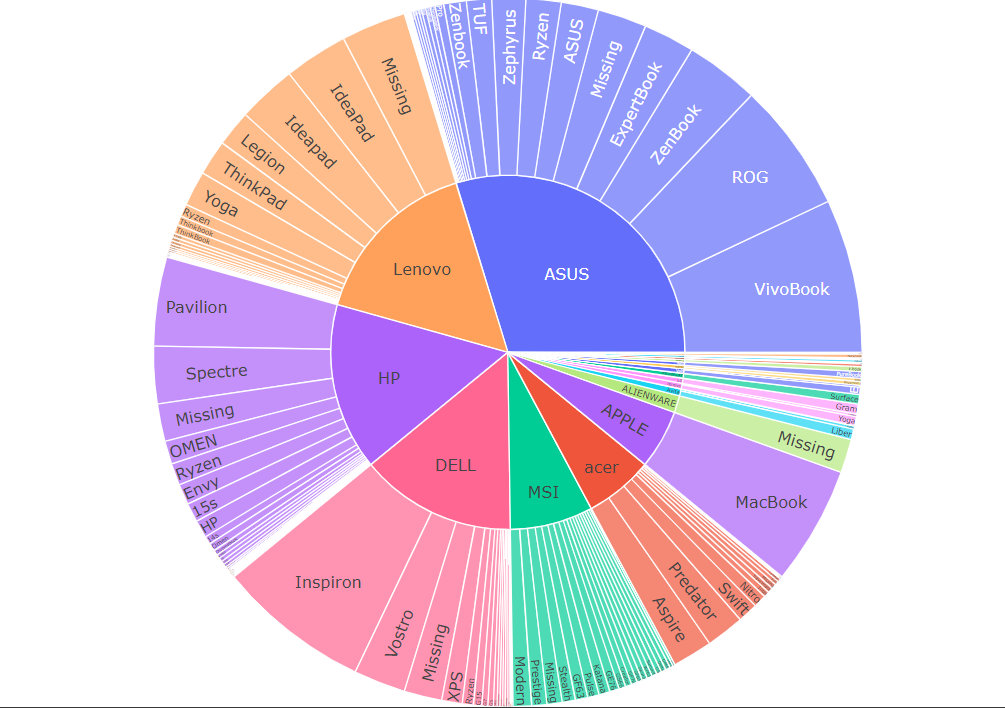

Text(0.5, 1.0, 'Top 10 Cheap Laptop Models')

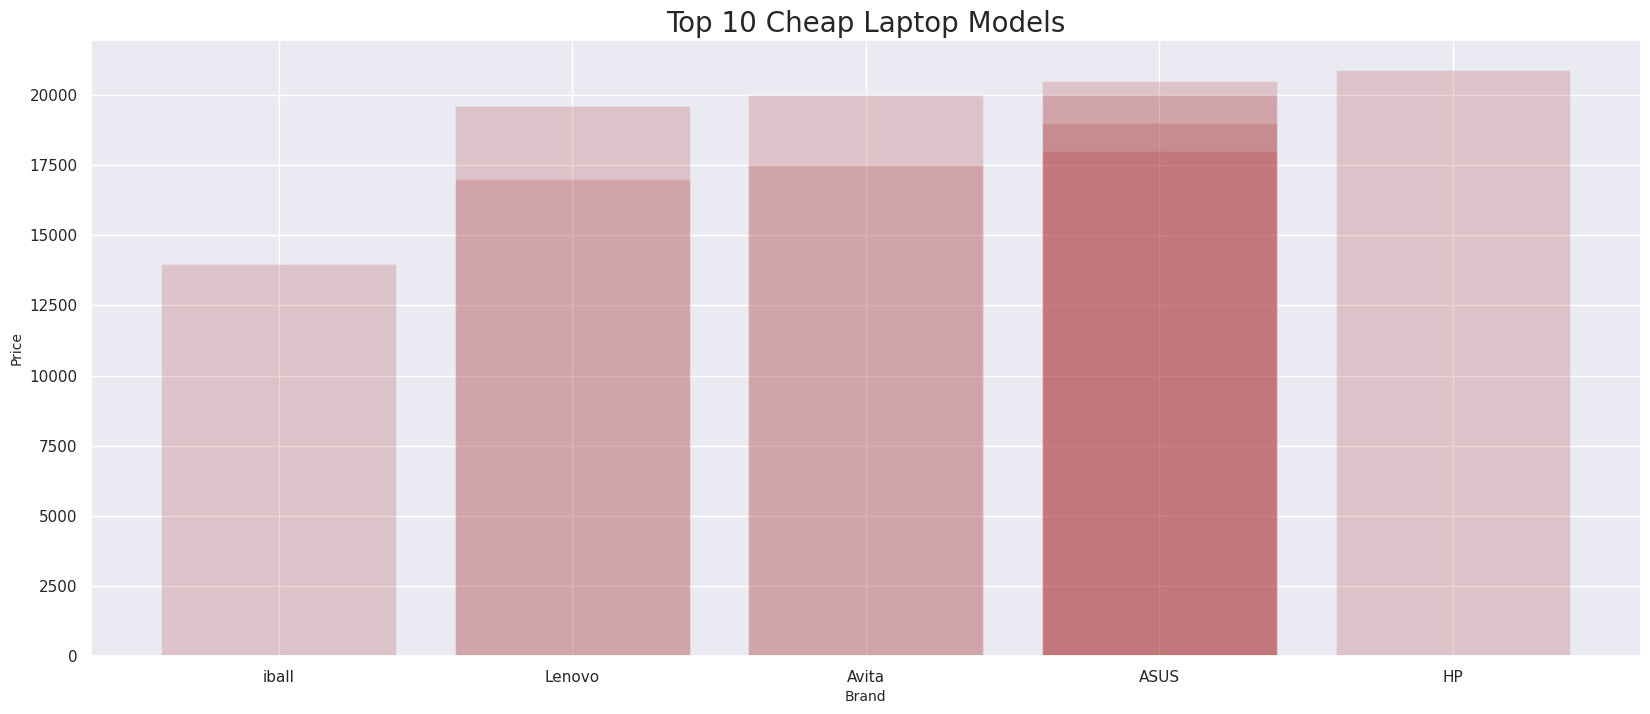

In [114]:
top10 = train.nsmallest(10,'latest_price')
plt.figure(figsize=(20,8))
plt.bar(top10['brand'], top10['latest_price'],color='brown',alpha=0.2)
plt.ylabel('Price', fontsize = 10)
plt.xlabel("Brand", fontsize = 10)
plt.title("Top 10 Cheap Laptop Models", fontsize = 20)

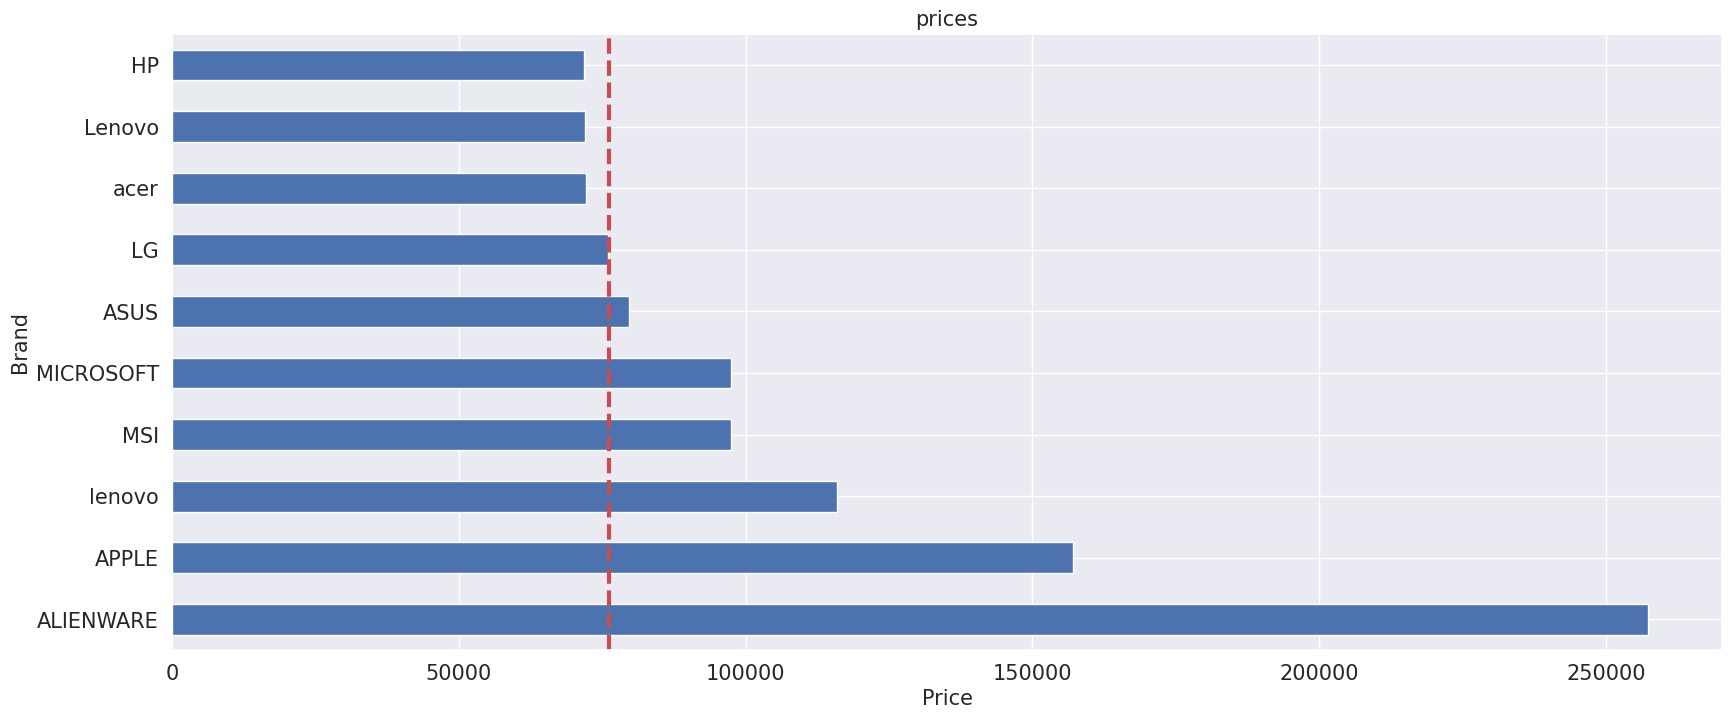

In [115]:
train[['brand','latest_price']].groupby('brand').mean().sort_values(by='latest_price', ascending = False).head(10).plot(kind = 'barh', grid = True, figsize = (20,8),
        fontsize = 15, rot =0, legend = None)
plt.axvline(train['latest_price'].mean(), color='r', linestyle='dashed', linewidth=3,label='the mean')
plt.xlabel('Price', fontsize = 15)
plt.ylabel('Brand', fontsize = 15)
plt.title("prices", fontsize = 15)
plt.show()

In [116]:
train.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'reviews'],
      dtype='object')

Let us analyze continuous variables.

In [117]:
numeric=['latest_price', 'old_price','ratings', 'reviews']

Text(0.5, 0.98, 'Visualizing continuous columns (train dataset)')

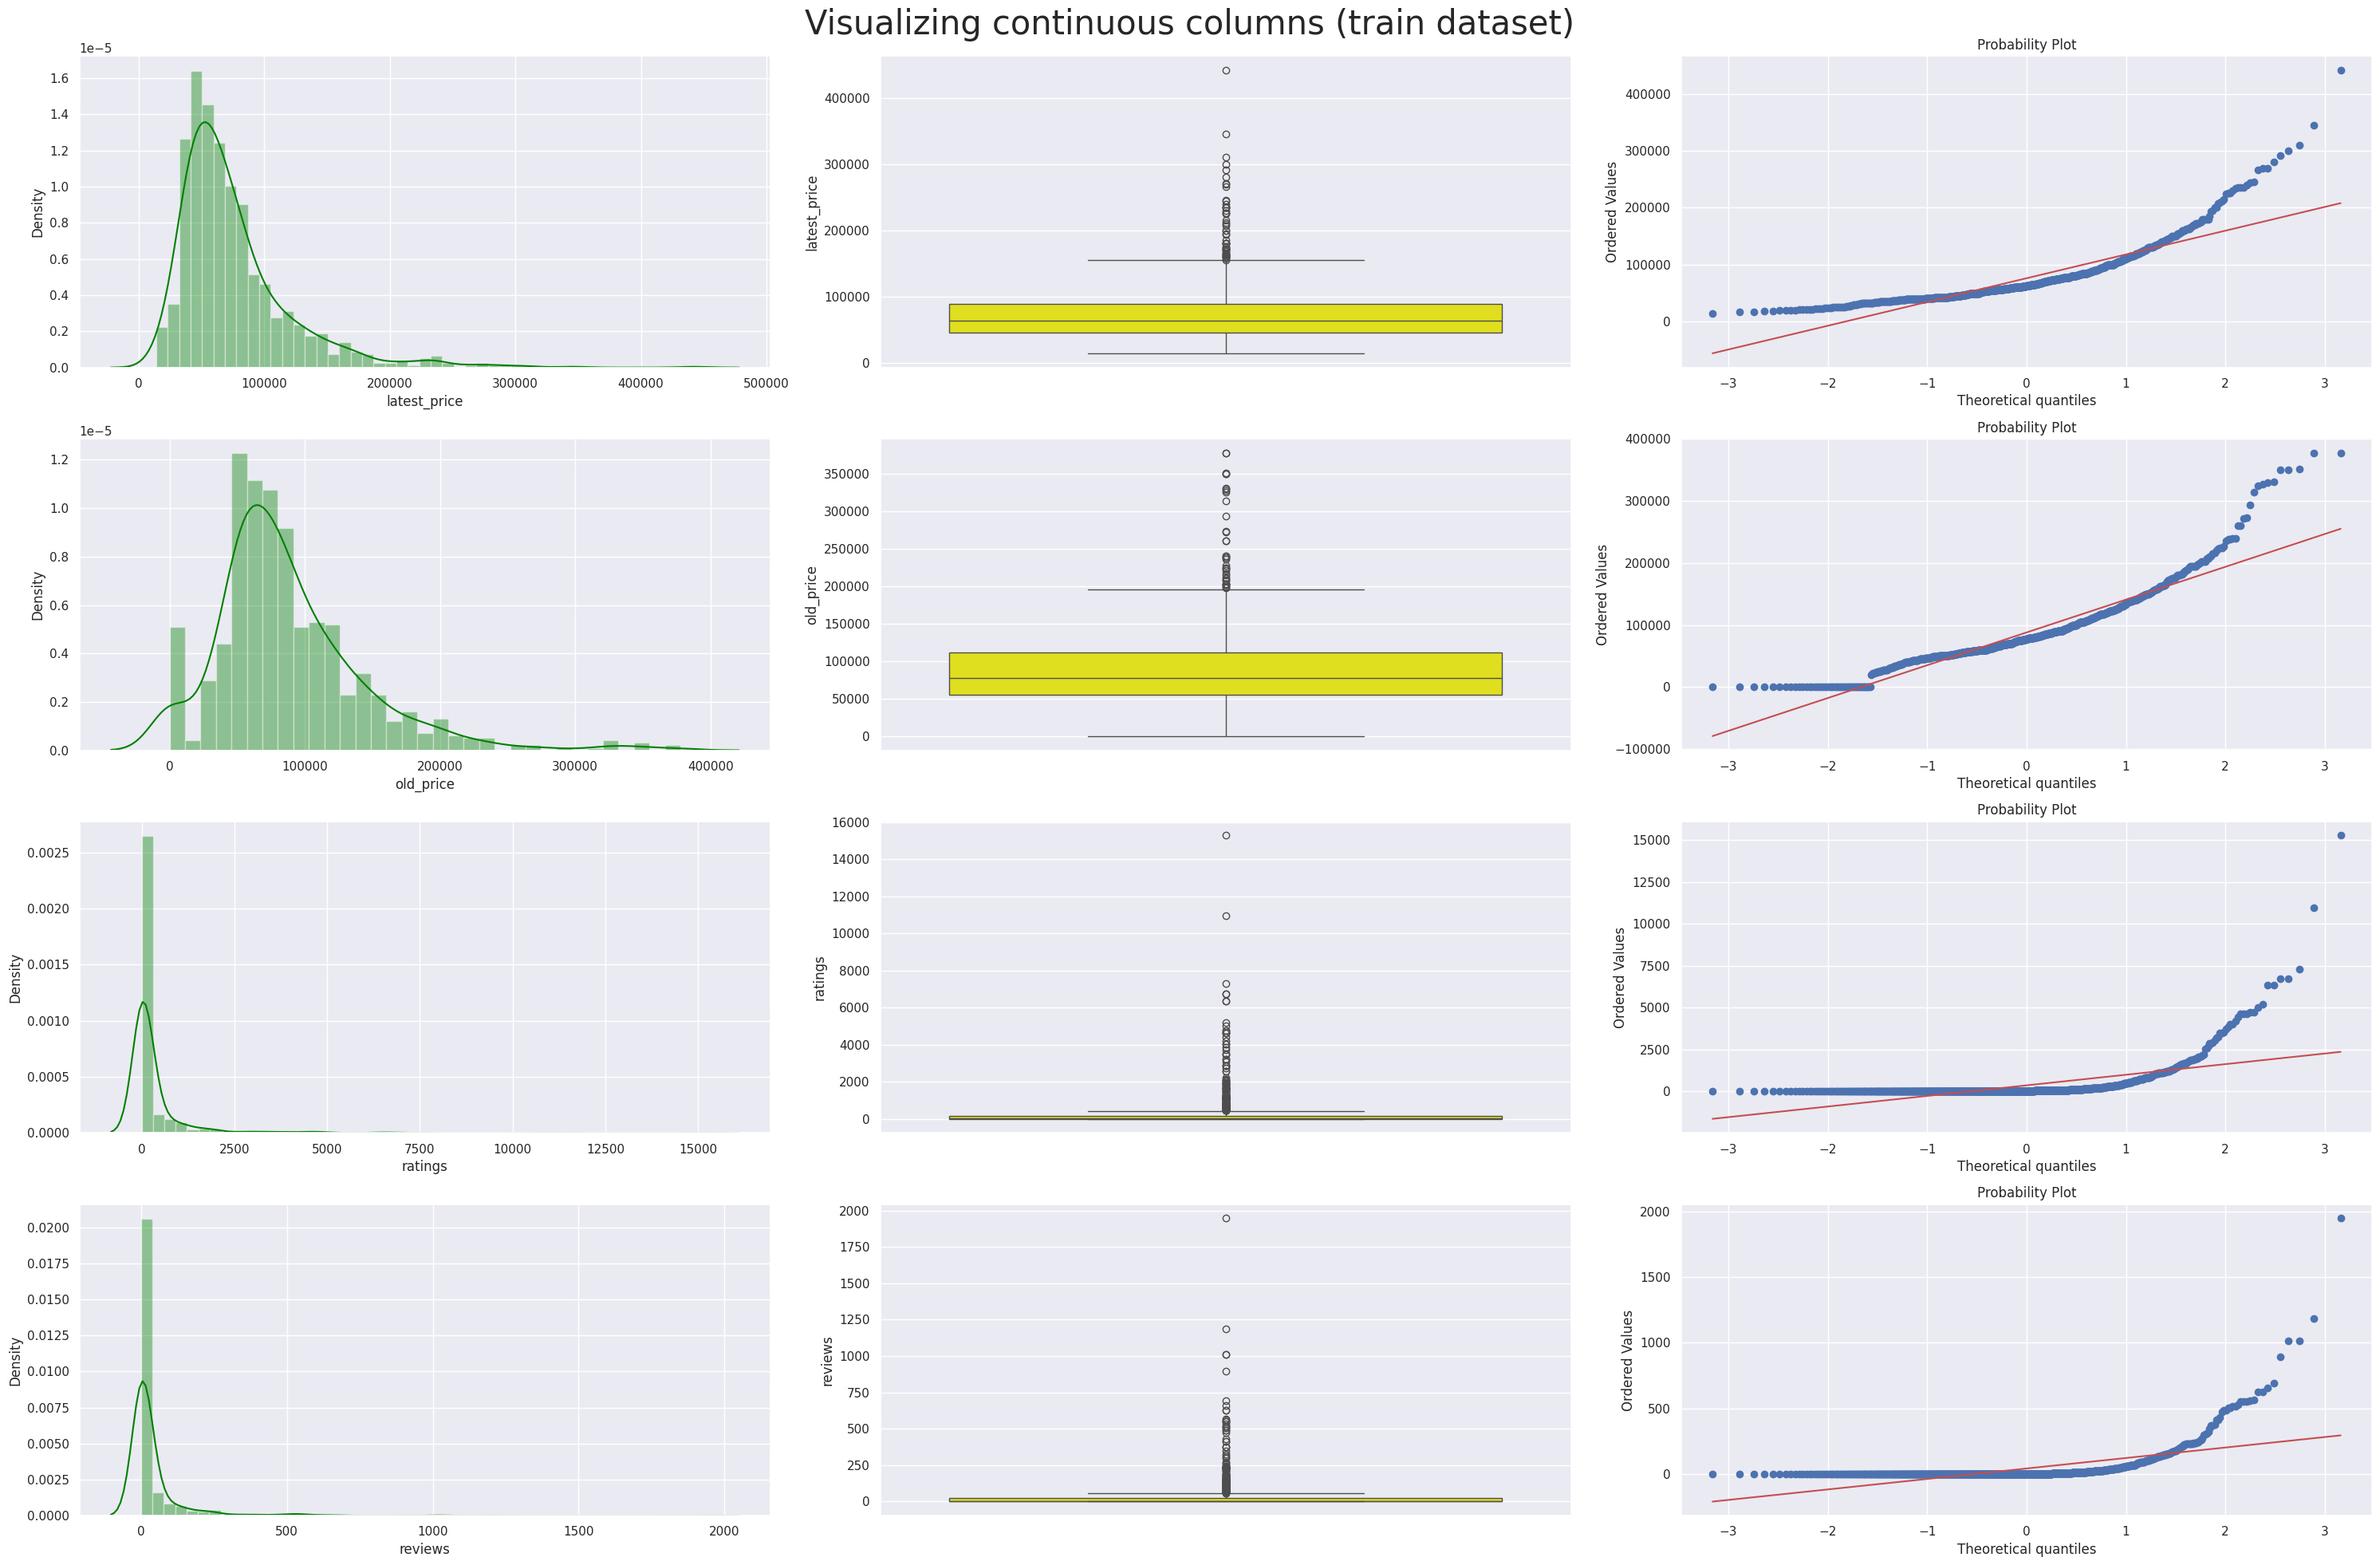

In [118]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(len(numeric),3,figsize=(30,20))
for index,i in enumerate(numeric):
    sns.distplot(train[i],ax=ax[index,0],color='green')
    sns.boxplot(train[i],ax=ax[index,1],color='yellow')
    stats.probplot(train[i],plot=ax[index,2])

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (train dataset)",fontsize=30)

Let's carry out a mini-analysis of the presented graphs.

* Laptop price variables are quantitative and have a relatively normal distribution with slight skews. To predict these variables, you can either use them or take the logarithm of the variable to get the best normal distribution.
* When forecasting target variables in the ratings, reviews variables, there are very strong outliers that will need to be removed. Deleting all data outliers is ideal, but you need to remember the unspoken rule that you need to delete no more than 1% of the dataset, otherwise there is a chance of losing important information. Also, when removing outliers, it is worth remembering that there is a premium segment of laptops that can be erroneously classified as outliers. Since the ratings,reviews variables will probably correlate with the target variables, it is not worth deleting outliers.




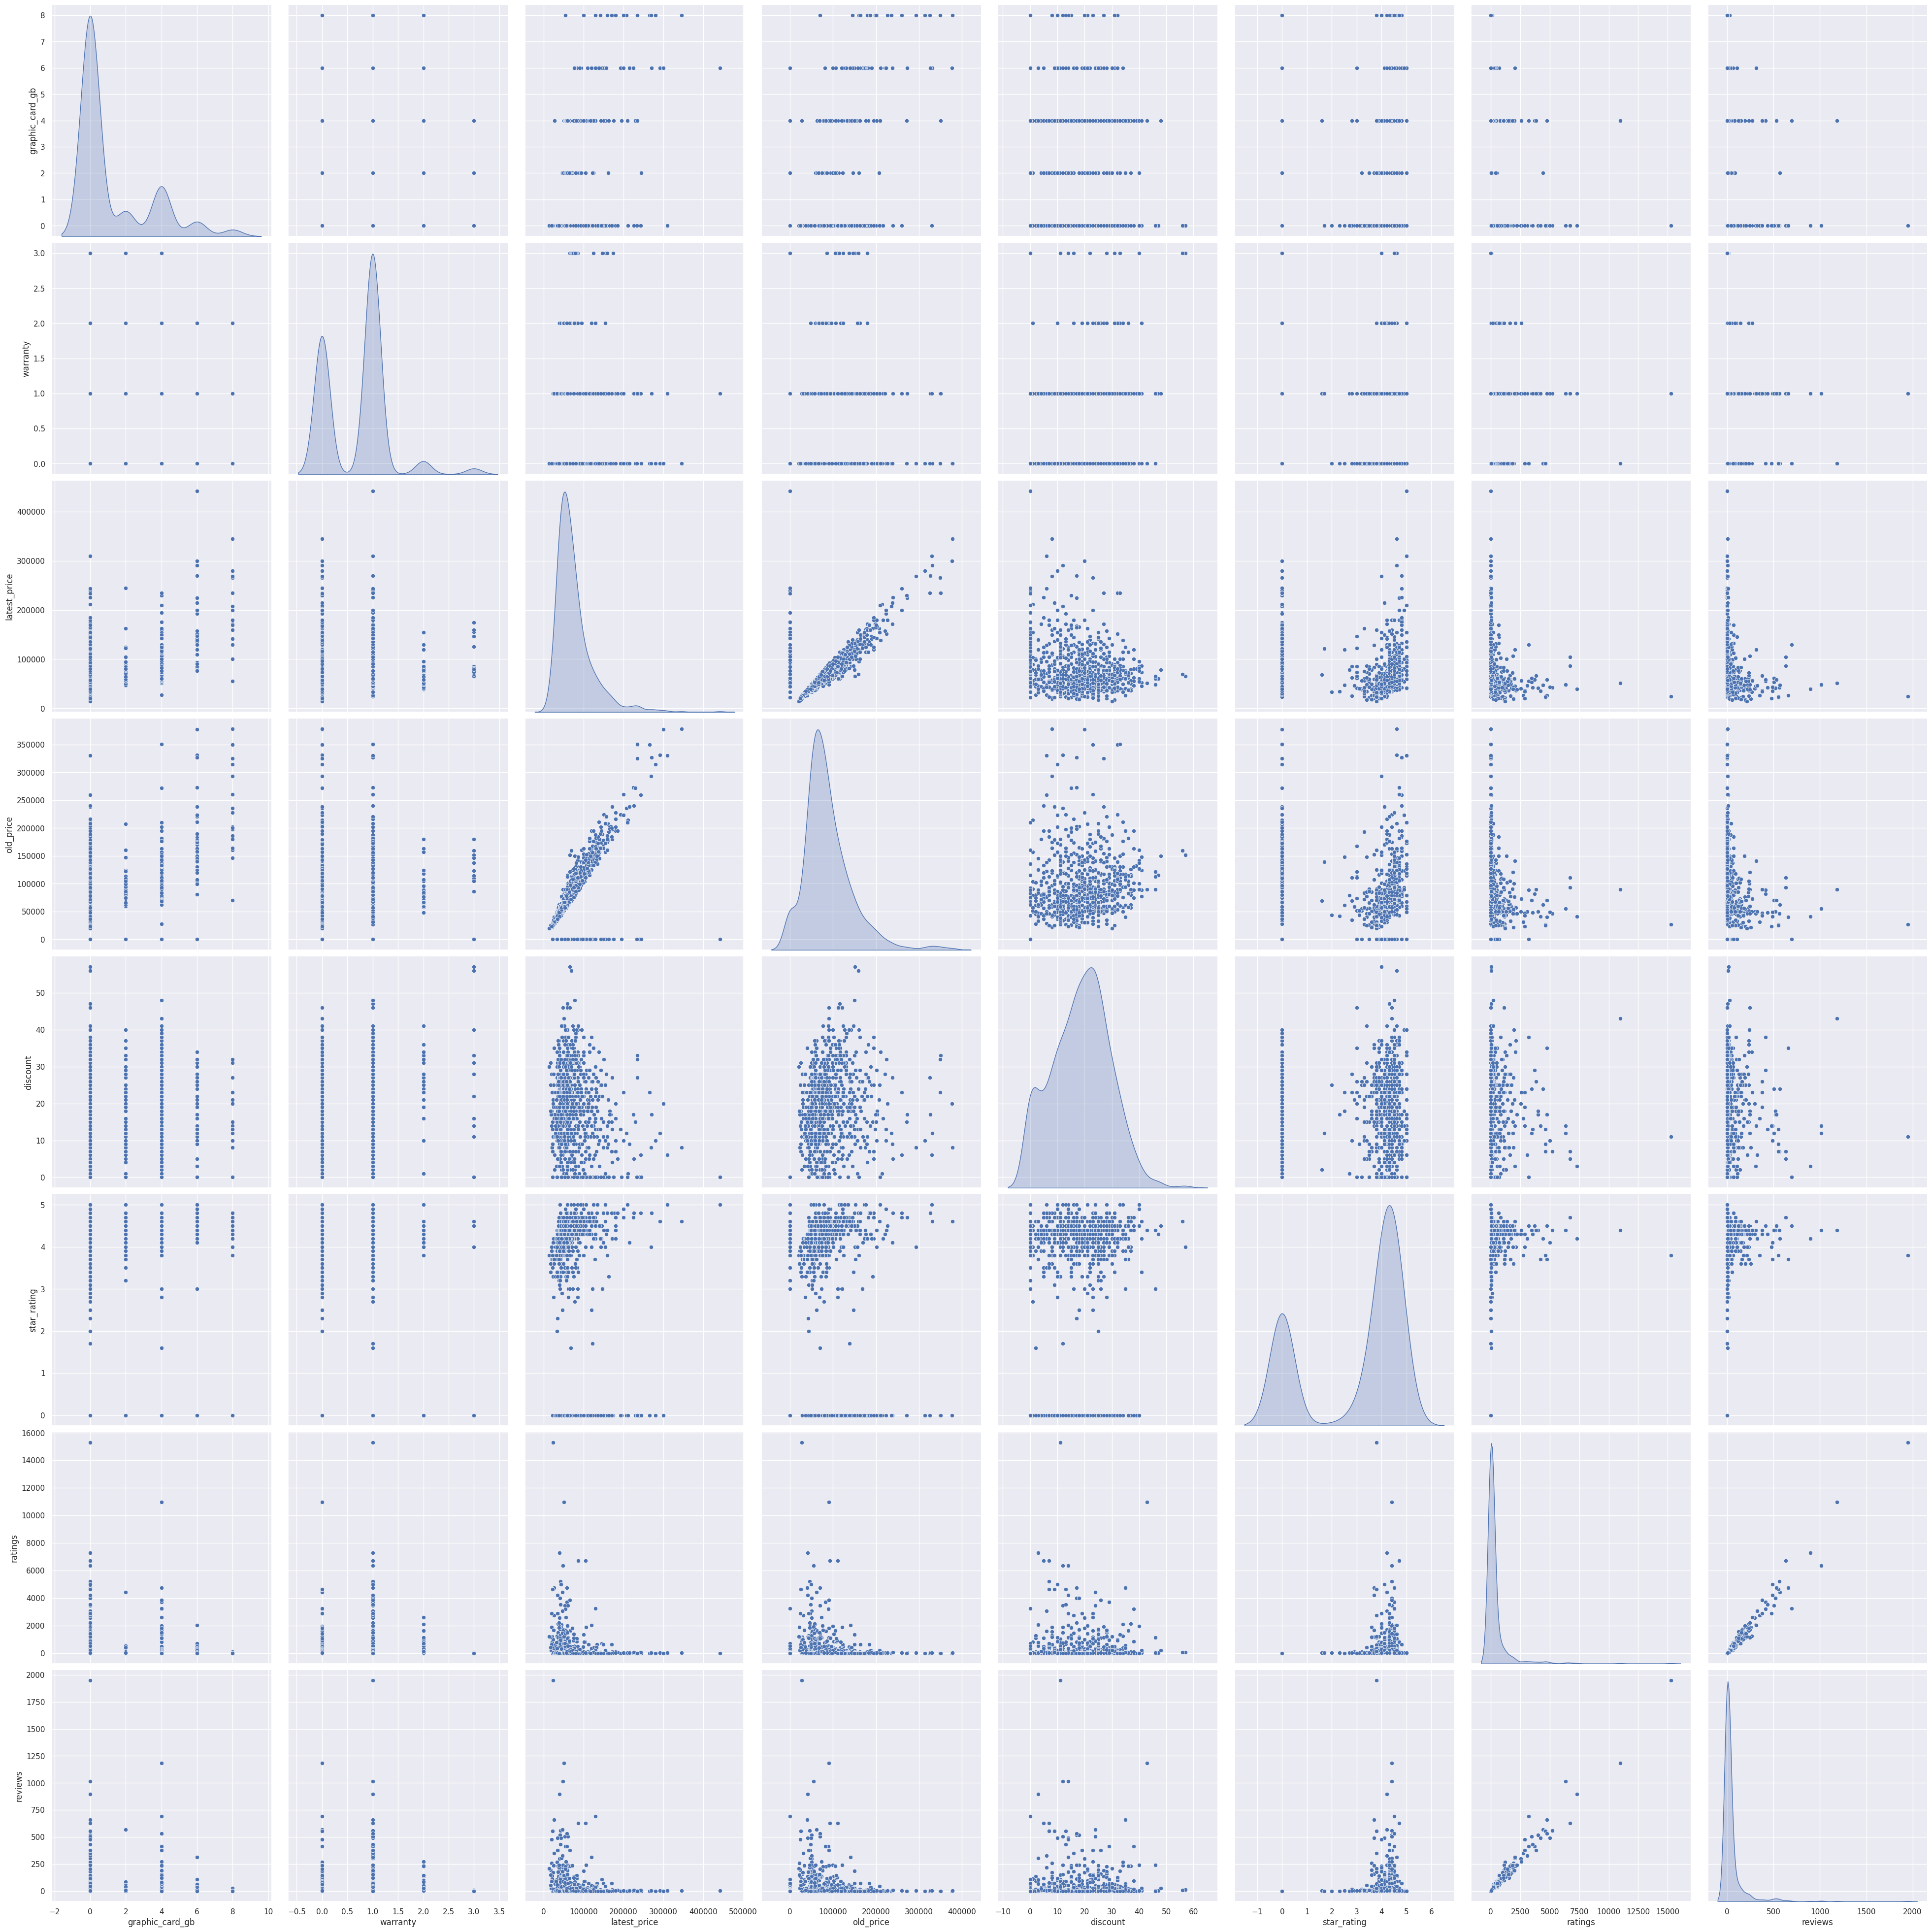

In [119]:
sns.set()
sns.pairplot(train,height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

On the graphs presented, it is easy to see the linear correlation of the ratings and reviews variables. There is also a correlation between latest_price and old_price.

Let's analyze categorical variables.

In [120]:
train.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'reviews'],
      dtype='object')

In [121]:
categorical_features=['brand', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'discount', 'star_rating']

<Figure size 1500x2500 with 0 Axes>

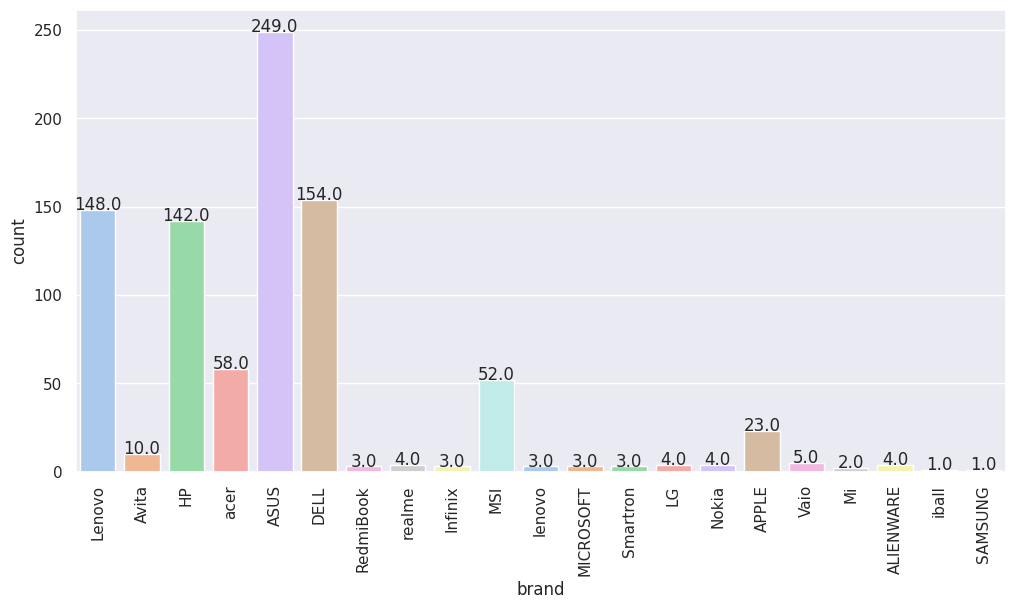

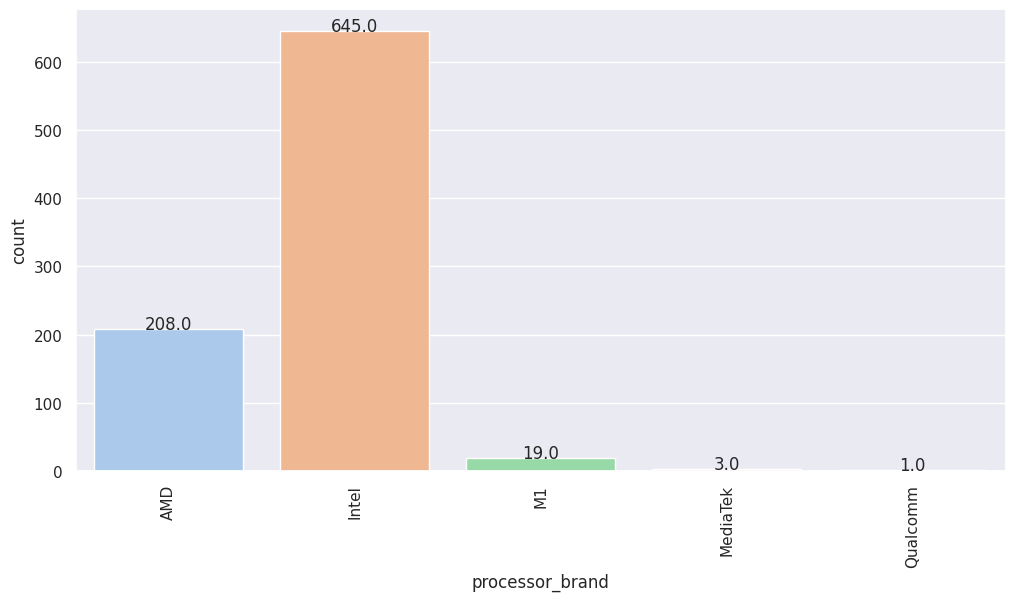

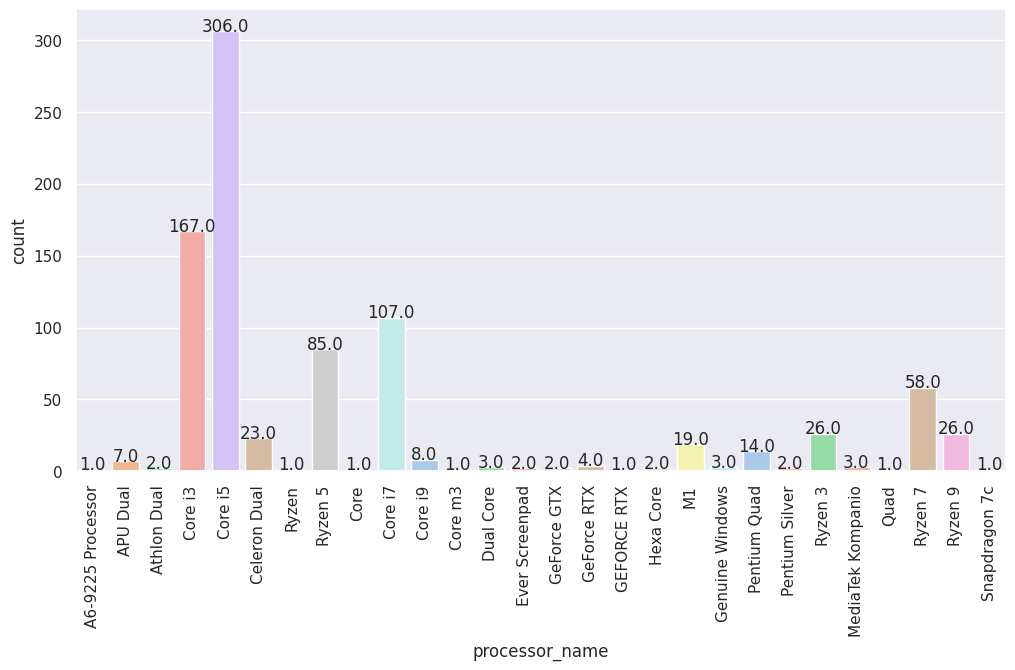

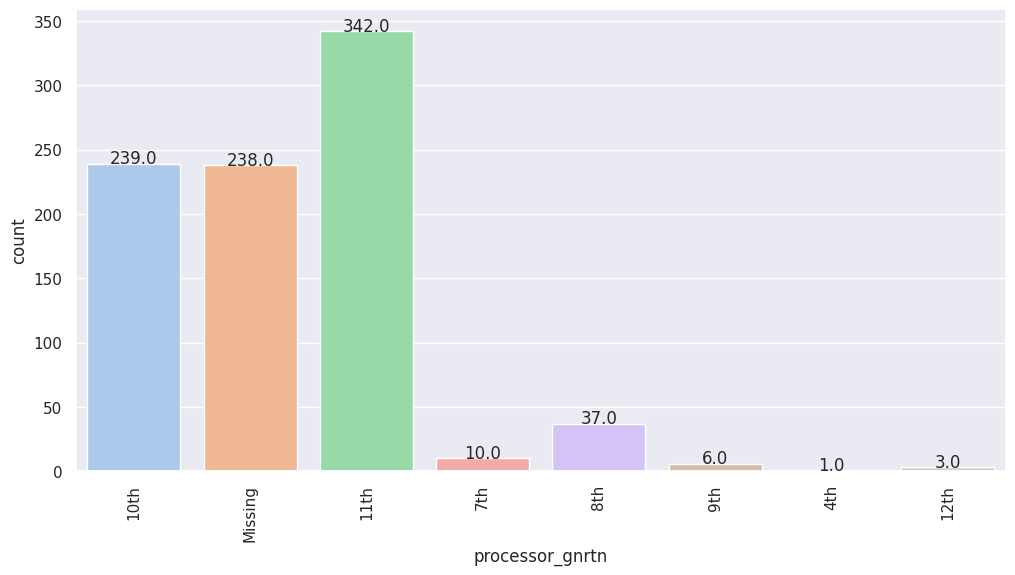

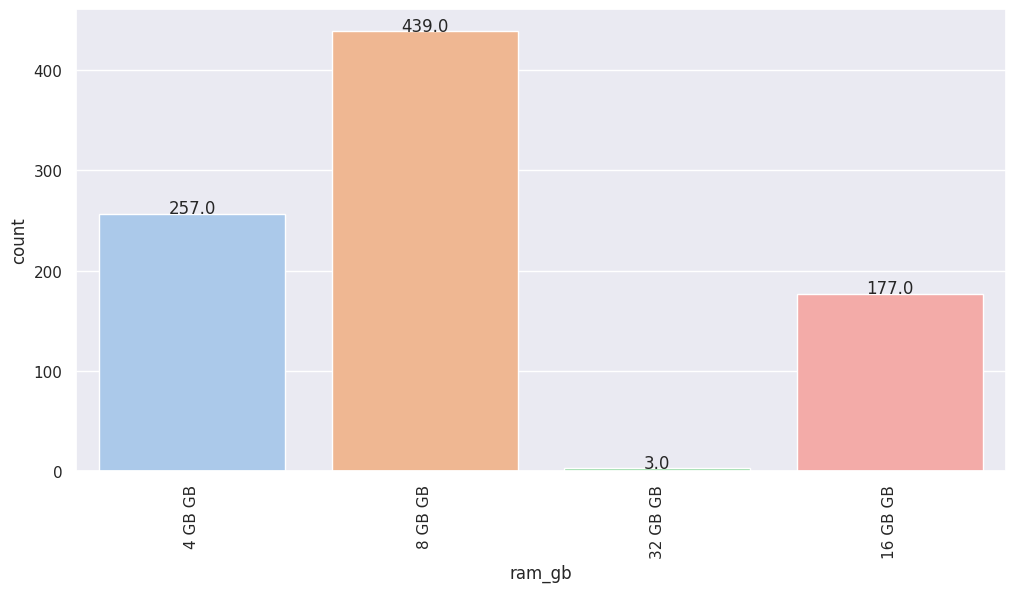

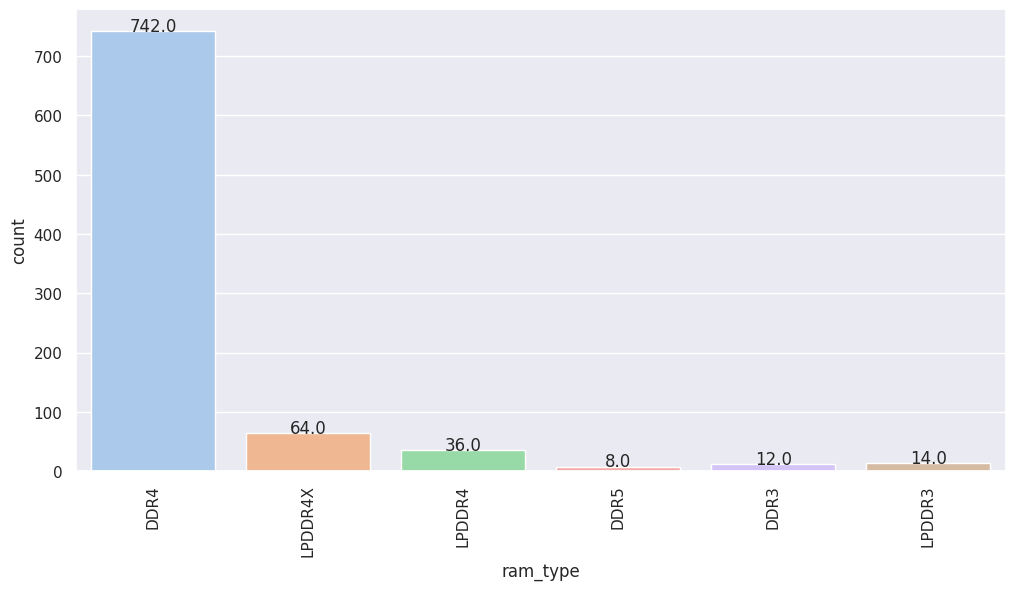

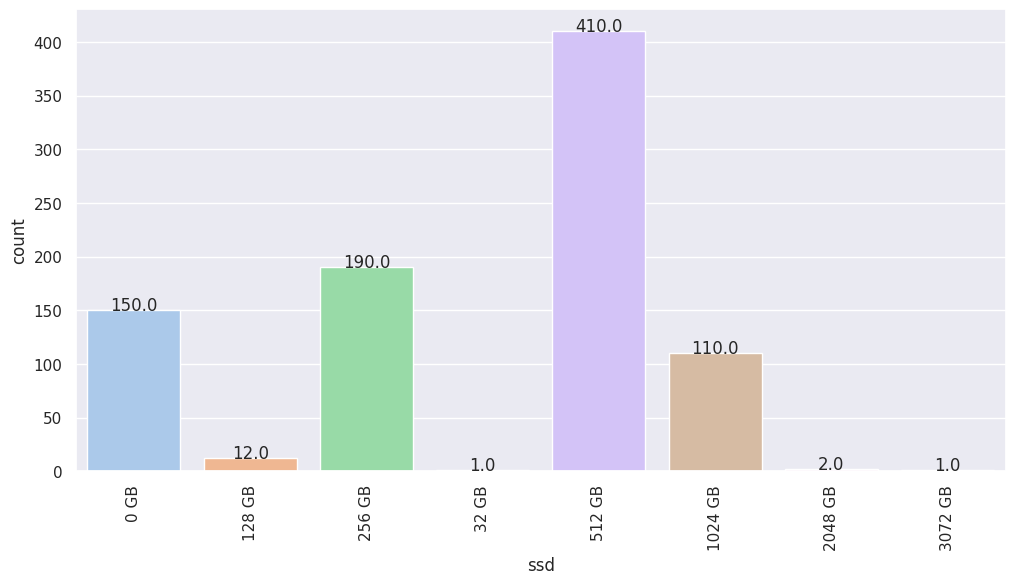

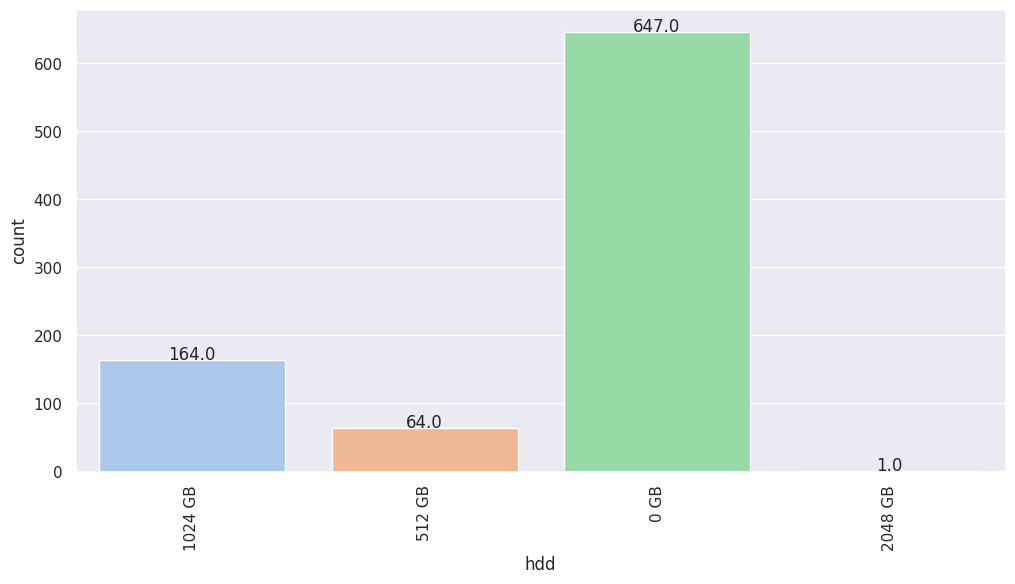

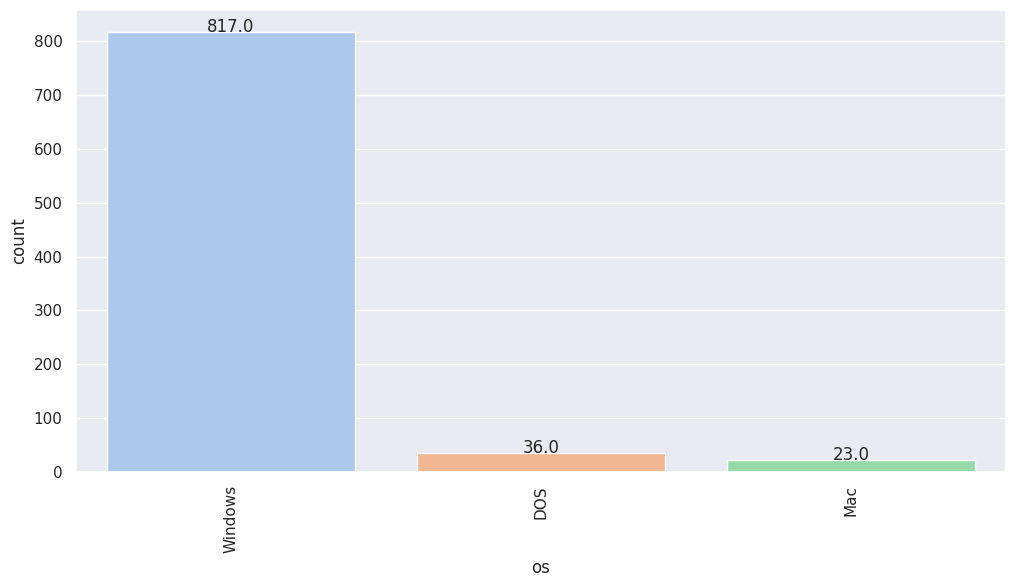

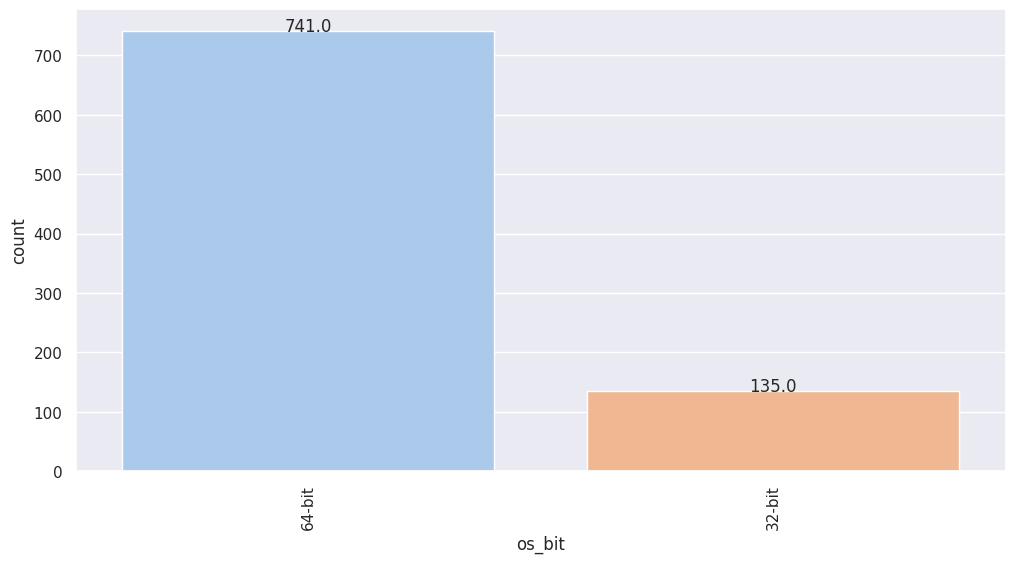

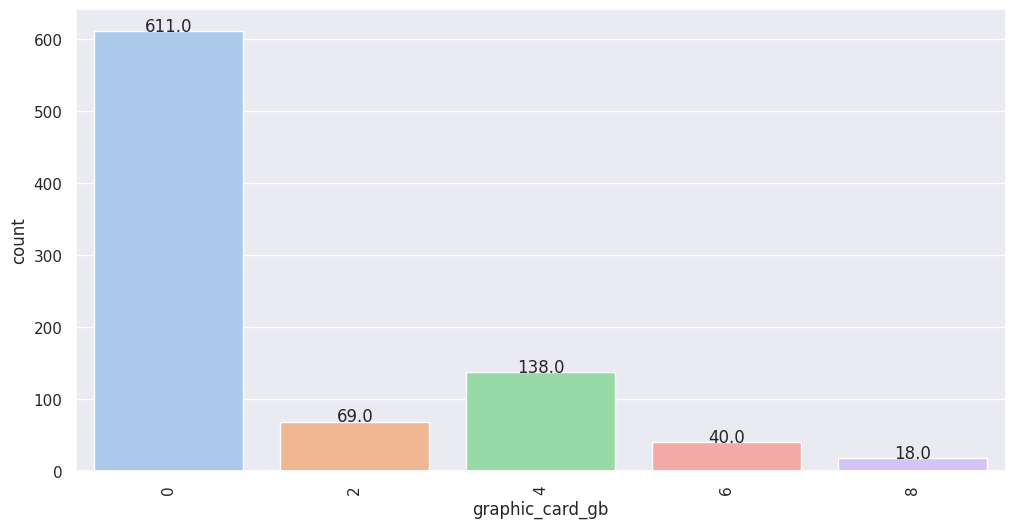

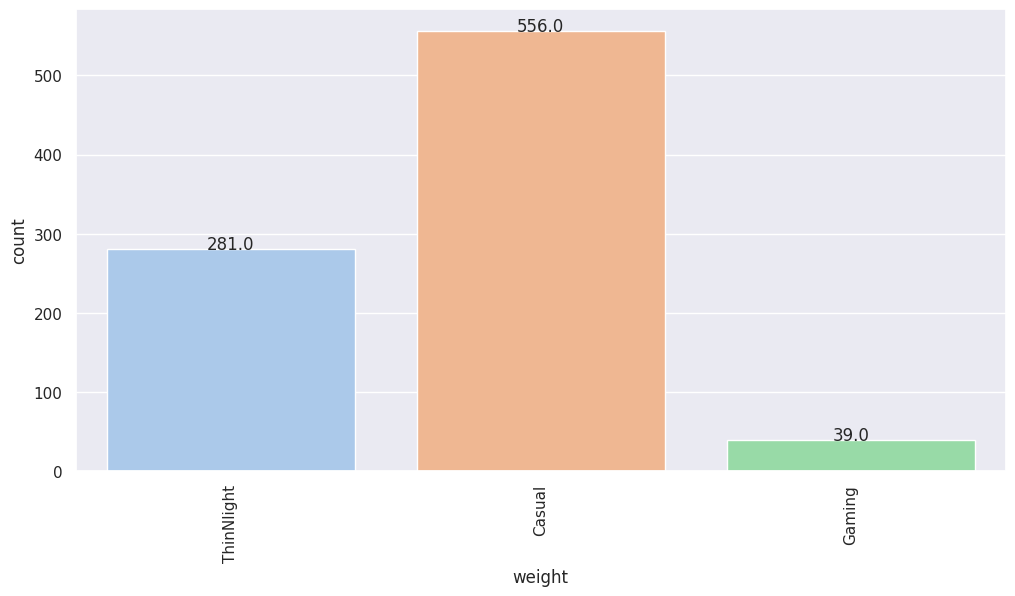

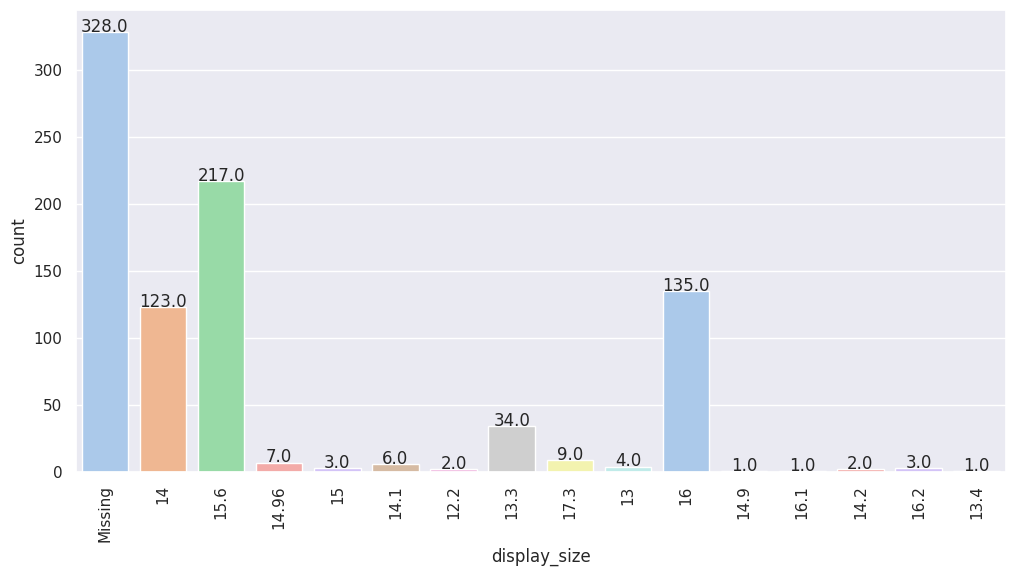

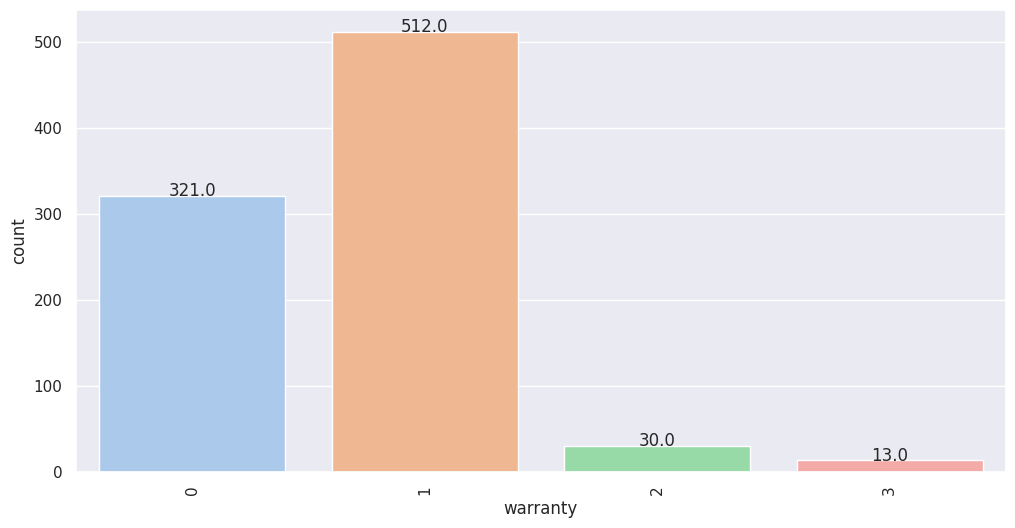

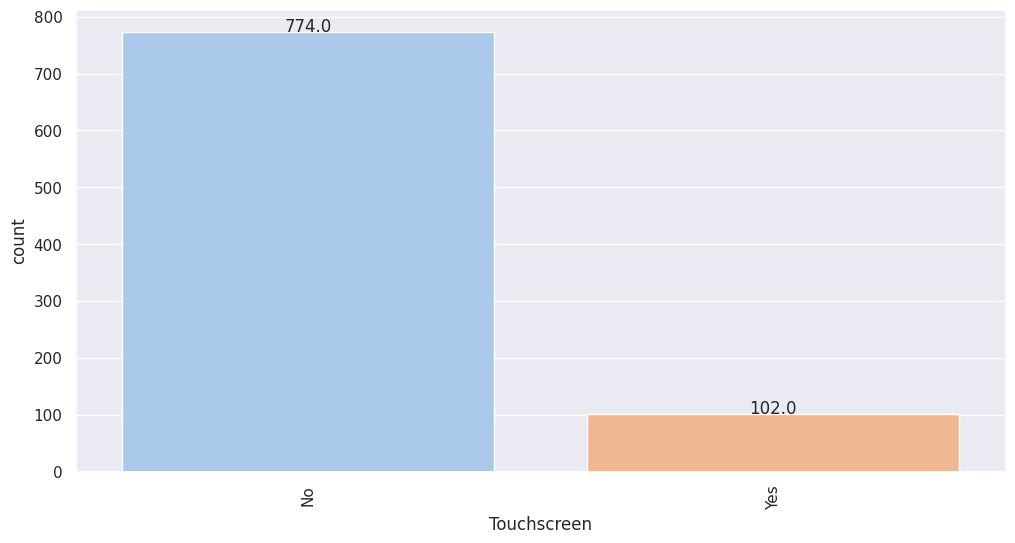

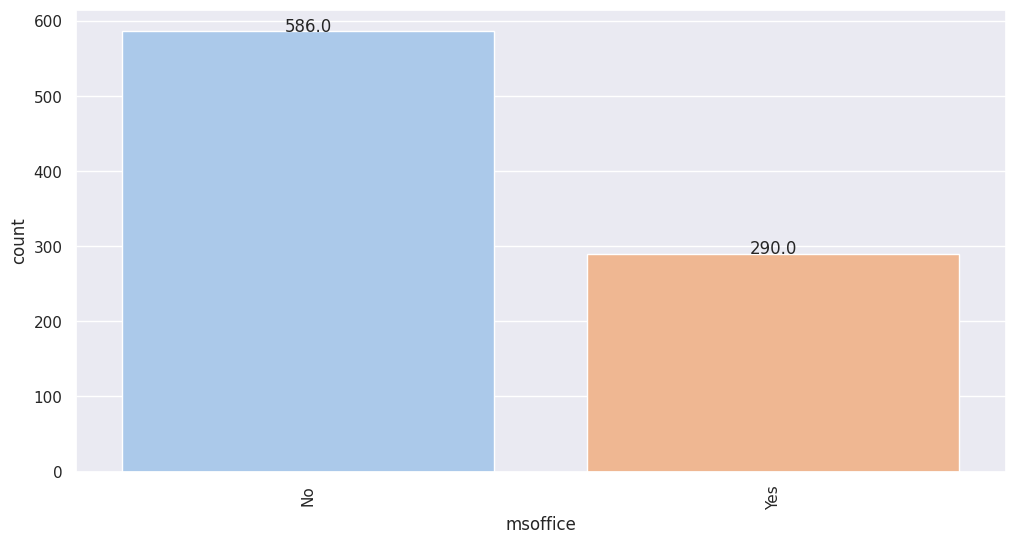

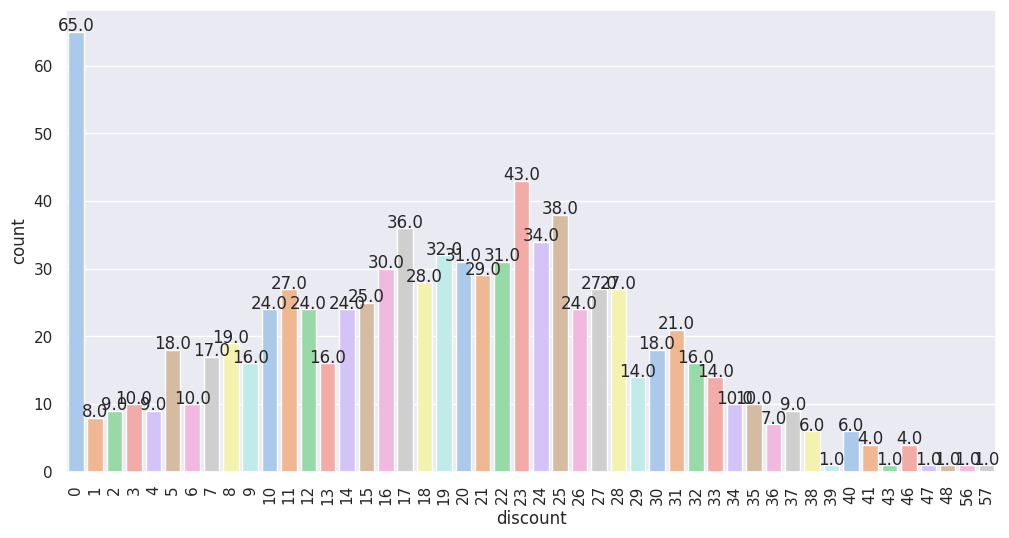

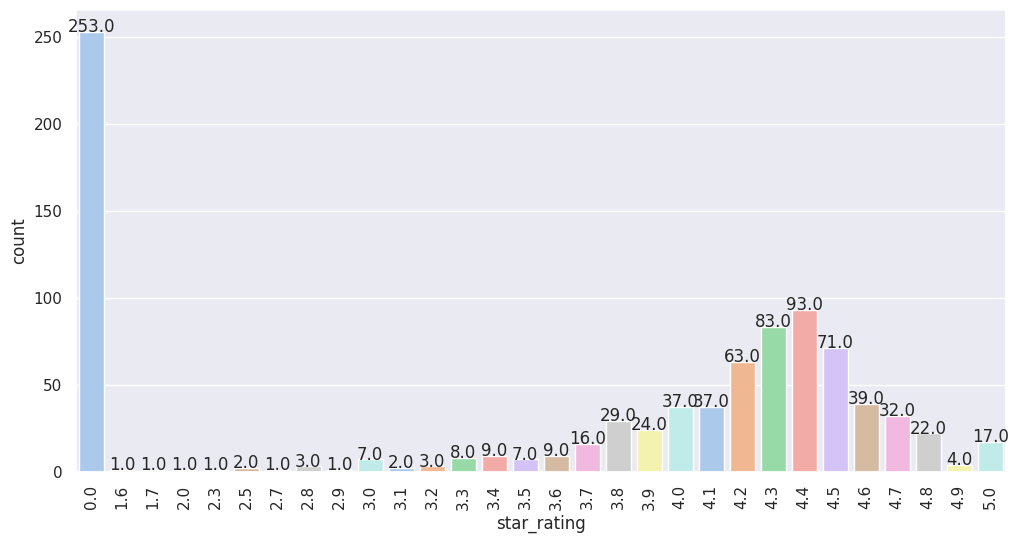

In [122]:
i=1
plt.figure(figsize = (15,25))
for feature in categorical_features:
  fig, ax1 = plt.subplots(figsize=(12,6))
  graph = sns.countplot(ax=ax1,x = feature , data = train,palette='pastel')
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
  for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
  i+=1

Let's analyze the obtained graphs.
* The largest number of laptops are produced under the brands ASUS, DELL, HP, Lenovo. Our data does not include quantitative notebook sales data, so a full market analysis is not possible.

* The mode of the display_size variable is 15.6, indicating high buyer demand. This is due to the fact that these laptops are used both at work and at home.
* The most common processors are Intel processors, especially Core i5, Core i7, Core i3. This phenomenon can be explained by low price and high performance.
* In the ram_gb variable, the value of 8 Gb is the mode. This means that this amount of memory is enough for most tasks. Demand creates supply:)
*Most laptops are sold with an SSD drive. Many manufacturers, in an effort to win in the competition, save on additional slots in laptops by installing only one storage device. Choosing such a model, for example, with a fast SSD, you risk being left without a system and without personal data.
The option with one HDD is also not very preferable, because. This type of media today demonstrates very low data exchange rates. Your system will be slow to boot, and applications will be annoying with the slowness of launching and processing data. Therefore, when choosing a device, give preference to the SSD + HDD dual disk system.
* The most common operating system value is Windows 64-bit. This can be explained by the simplicity and cheapness of using this system, as well as a much more extended distribution of programs.
* Gaming laptops are not popular because for games, stationary computers are used, in which the equipment is much more powerful.

